# Logistic Regression

`Logistic Regression` is used to classify two linearly separable groups.
This linearly separable assumption makes logistic regression extremely fast and powerful for simple Machine Learning tasks.

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

plt.style.use('fivethirtyeight')

# Data Input

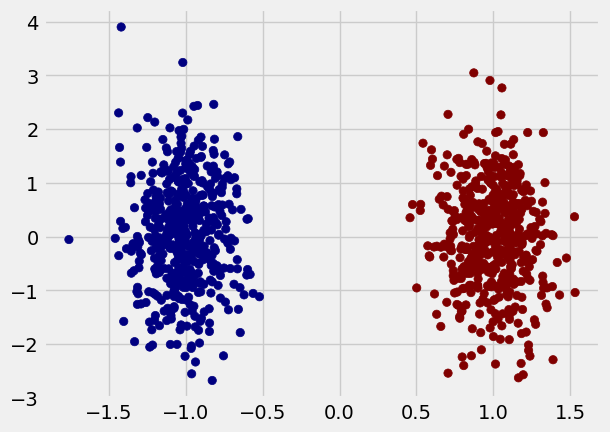

In [3]:
separable = False
while not separable:
    samples = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])

red_labels = np.zeros(len(red))
blue_labels = np.ones(len(blue))

labels = np.append(red_labels, blue_labels)
inputs = np.concatenate((red,blue),axis=0)

plt.scatter(inputs[:, 0], inputs[:, 1], cmap='jet', c=labels)

# Splitting our dataset into a train/test split

In [4]:
inputs = torch.Tensor(inputs)
labels = torch.Tensor(labels)

X_train, X_test, y_train,  y_test = train_test_split(inputs, labels, test_size=0.33, random_state=42)

# Pytorch Model

<img src='media/logistic_regression.png' width="400">
<img src='media/logistic_regression_function.png' width="400">

`Sigmoid Activation` transforms our linear regression output to a probability from 0 to 1. We can then take any probability greater than 0.5 as being 1 and below as being 0.
<img src='media/logistic_regresstion_sigmoid.png' width="400">

In [5]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [6]:
input_dim = 2 # Two inputs x1 and x2 
output_dim = 1 # Two possible outputs
learning_rate = 0.01

model = LogisticRegression(input_dim, output_dim)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
losses = []
losses_test = []
Iterations = []
itera = 0
epochs = 200_000
for epoch in tqdm(range(epochs), desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) # [200,1] -squeeze-> [200]
    loss.backward() # Computes the gradient of the given tensor w.r.t. graph leaves 
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    itera += 1
    if itera % 10000 == 0:
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item():,.3f}. Accuracy: {accuracy_test:,.3f}")
            print(f"Train -  Loss: {loss.item():,.3f}. Accuracy: {accuracy:,.3f}\n")

Training Epochs:   6%|▌         | 11463/200000 [00:01<00:20, 9321.81it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.014. Accuracy: 100.000
Train -  Loss: 0.013. Accuracy: 100.000



Training Epochs:  11%|█         | 21108/200000 [00:02<00:18, 9458.16it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.008. Accuracy: 100.000
Train -  Loss: 0.007. Accuracy: 100.000



Training Epochs:  16%|█▌        | 31997/200000 [00:03<00:16, 9902.23it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.005. Accuracy: 100.000
Train -  Loss: 0.005. Accuracy: 100.000



Training Epochs:  21%|██        | 41946/200000 [00:04<00:16, 9704.25it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.004. Accuracy: 100.000
Train -  Loss: 0.004. Accuracy: 100.000



Training Epochs:  26%|██▌       | 51757/200000 [00:05<00:15, 9359.96it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.003. Accuracy: 100.000
Train -  Loss: 0.003. Accuracy: 100.000



Training Epochs:  31%|███       | 61622/200000 [00:06<00:14, 9690.57it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.003. Accuracy: 100.000
Train -  Loss: 0.002. Accuracy: 100.000



Training Epochs:  36%|███▌      | 71426/200000 [00:07<00:13, 9695.82it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.003. Accuracy: 100.000
Train -  Loss: 0.002. Accuracy: 100.000



Training Epochs:  41%|████      | 81195/200000 [00:08<00:12, 9471.43it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.002. Accuracy: 100.000
Train -  Loss: 0.002. Accuracy: 100.000



Training Epochs:  46%|████▌     | 91008/200000 [00:09<00:11, 9543.64it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.002. Accuracy: 100.000
Train -  Loss: 0.002. Accuracy: 100.000



Training Epochs:  51%|█████     | 101781/200000 [00:10<00:10, 9652.32it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.002. Accuracy: 100.000
Train -  Loss: 0.001. Accuracy: 100.000



Training Epochs:  56%|█████▌    | 111575/200000 [00:11<00:09, 9813.42it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.002. Accuracy: 100.000
Train -  Loss: 0.001. Accuracy: 100.000



Training Epochs:  61%|██████    | 121436/200000 [00:12<00:08, 9777.82it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.002. Accuracy: 100.000
Train -  Loss: 0.001. Accuracy: 100.000



Training Epochs:  66%|██████▌   | 131321/200000 [00:13<00:06, 9865.37it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.001. Accuracy: 100.000
Train -  Loss: 0.001. Accuracy: 100.000



Training Epochs:  71%|███████   | 141297/200000 [00:14<00:05, 9873.19it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.001. Accuracy: 100.000
Train -  Loss: 0.001. Accuracy: 100.000



Training Epochs:  76%|███████▌  | 151178/200000 [00:15<00:04, 9882.27it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.001. Accuracy: 100.000
Train -  Loss: 0.001. Accuracy: 100.000



Training Epochs:  81%|████████  | 161132/200000 [00:16<00:03, 9897.70it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.001. Accuracy: 100.000
Train -  Loss: 0.001. Accuracy: 100.000



Training Epochs:  86%|████████▌ | 171119/200000 [00:17<00:02, 9833.15it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.001. Accuracy: 100.000
Train -  Loss: 0.001. Accuracy: 100.000



Training Epochs:  91%|█████████ | 182104/200000 [00:18<00:01, 9905.36it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.001. Accuracy: 100.000
Train -  Loss: 0.001. Accuracy: 100.000



Training Epochs:  96%|█████████▌| 191080/200000 [00:19<00:00, 9945.12it/s]

Iteration: <built-in function iter>. 
Test - Loss: 0.001. Accuracy: 100.000
Train -  Loss: 0.001. Accuracy: 100.000



Training Epochs: 100%|██████████| 200000/200000 [00:20<00:00, 9723.24it/s] 

Iteration: <built-in function iter>. 
Test - Loss: 0.001. Accuracy: 100.000
Train -  Loss: 0.001. Accuracy: 100.000



# Plotting the Results

In [12]:
def model_plot(model, inputs, y, title):
    parm = {}
    for name, param in model.named_parameters():
        parm[name]=param.detach().numpy()  
    
    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    plt.scatter(inputs[:, 0], inputs[:, 1], c=y,cmap='jet')

    u = np.linspace(inputs[:, 0].min(), inputs[:, 0].max(), 2)
    plt.plot(u, (0.5-b-w[0]*u)/w[1])

    plt.xlim(inputs[:, 0].min()-0.5, inputs[:, 0].max()+0.5)
    plt.ylim(inputs[:, 1].min()-0.5, inputs[:, 1].max()+0.5)
    plt.title(title)
    plt.show()

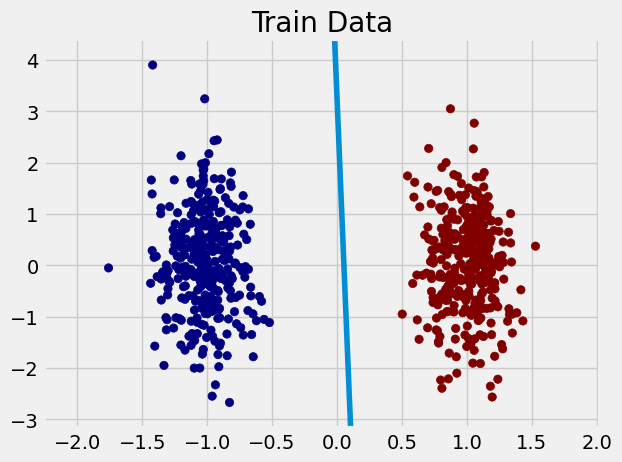

In [15]:
model_plot(model, X_train, y_train, 'Train Data')

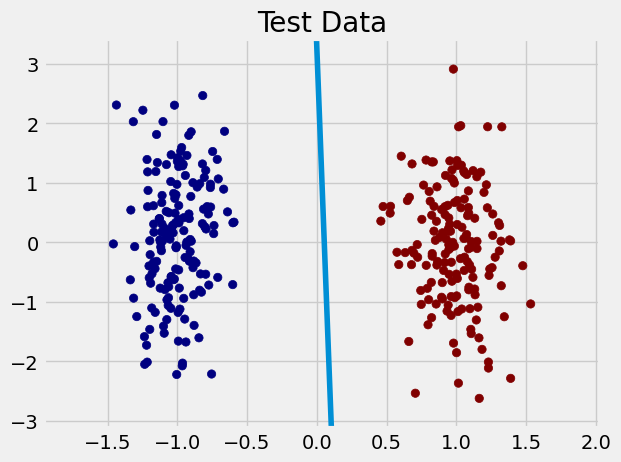

In [16]:
model_plot(model, X_test, y_test, 'Test Data')